In [1]:
import math
import zipfile
from PIL import Image, ImageOps, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
parsed_img = {}

In [7]:
with zipfile.ZipFile('small_img.zip', 'r') as archive:
    for entry in archive.infolist():
        with archive.open(entry) as file:
            image = Image.open(file).convert('RGB')
            parsed_img[entry.filename] = {'pil_img':image}

In [8]:
for imgName in parsed_img.keys():
    text = pytesseract.image_to_string(parsed_img[imgName]['pil_img'])
    parsed_img[imgName]['text'] = text

In [9]:
for imgName in parsed_img.keys():
    open_cv_image = np.array(parsed_img[imgName]['pil_img']) 
    img = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
    faces_bounding_boxes = face_cascade.detectMultiScale(img, 1.3, 5)
    parsed_img[imgName]['faces'] = []
    for x,y,w,h in faces_bounding_boxes:
        face = parsed_img[imgName]['pil_img'].crop((x,y,x+w,y+h))
        parsed_img[imgName]['faces'].append(face)

In [10]:

for imgName in parsed_img.keys():
    for face in parsed_img[imgName]['faces']:
        face.thumbnail((100,100),Image.ANTIALIAS)

In [11]:

def search(keyword):
    for imgName in parsed_img:
        if (keyword in parsed_img[imgName]['text']):
            if(len(parsed_img[imgName]['faces']) != 0):
                print("Result found in file {}".format(imgName))
                h = math.ceil(len(parsed_img[imgName]['faces'])/5)
                sheet=Image.new('RGB',(500, 100*h))
                xc = 0
                yc = 0
                for img in parsed_img[imgName]['faces']:
                    contact_sheet.paste(img, (xc, yc))
                    if xc + 100 == contact_sheet.width:
                        xc = 0
                        yc += 100
                    else:
                        xc += 100
                        
                display(sheet)
            else:
                print("Result found in file {} \nBut there were no faces in that file\n\n".format(img_name))
    return

Result found in file a-0.png


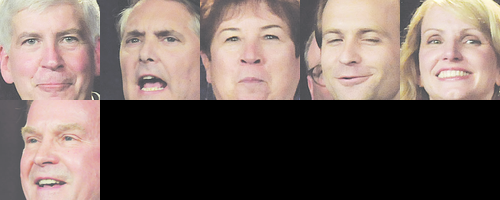

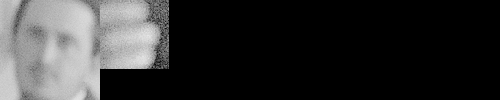

Result found in file a-3.png


In [12]:
search('Christopher')

Result found in file a-0.png


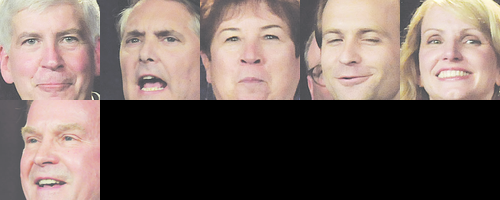

Result found in file a-1.png


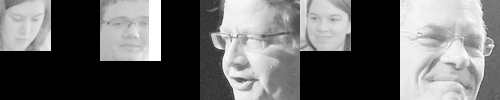

Result found in file a-2.png


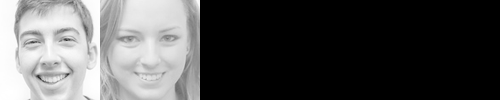

Result found in file a-3.png


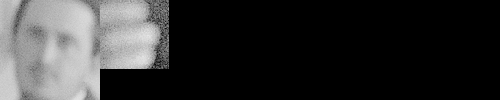

In [13]:
search('Mark')